# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [85]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pickle

In [86]:
cd

C:\Users\sjrek


In [87]:
# need to correct path
path="C:\Springboard\Github\Guided Capstone"
os.chdir(path) 

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

Why wouldn't I just pickle the model and reload it? It seems like unnecessary work to rebuild it.

#### Best Model 

In [88]:
df = pd.read_csv("step3_output.csv")

In [89]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [90]:
# drop the unnecessary and scale the variables
X = df.drop(['Name','AdultWeekend','state', 'summit_elev'], axis=1)
y = df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)

In [91]:
# flatten the y values
y = y.ravel()
# create test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [92]:
# use the random forest again
regressor = RandomForestRegressor(random_state=0, n_estimators=200)
model1 = regressor.fit(X_train, y_train)
model1.score(X_test, y_test)

0.7939868280905577

This is pretty good. Let's look at the other scores

In [93]:
y_pred1 = model1.predict(X_test)
m1_evs = explained_variance_score(y_test, y_pred1)
m1_evs

0.8096992535606947

In [94]:
m1_mae = mean_absolute_error(y_test, y_pred1)
m1_mae

6.297602578361983

These are very similar to before, so the model looks good.

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

Since Big Mountain (aka Whitefish) was deleted as an outlier in our preprocessing, I will have to load it back in.

In [95]:
with open("big_mtn", 'rb') as file:
    big_mountain = pickle.load(file)

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [96]:
X_big = big_mountain.drop(['Name','AdultWeekend','state','summit_elev','Region'], axis=1)
X_big

,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac
151,2353,4464,0,0.0,0,3,2,6,0,3,...,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,123.0,600.0


In [97]:
scaler_big = preprocessing.StandardScaler().fit(X_big)
X_big_scaled=scaler_big.transform(X_big)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [98]:
y_pred_big = model1.predict(X_big_scaled)

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [99]:
print(y_pred_big[0])

59.18794130434785


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [100]:
ac = big_mountain

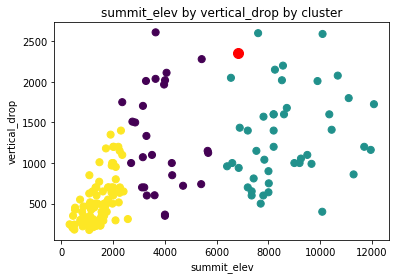

In [101]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

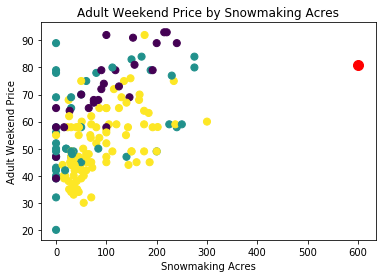

In [102]:
plt.scatter(df['Snow Making_ac'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['Snow Making_ac'], ac['AdultWeekend'], c='red', s=100)
plt.xlabel('Snowmaking Acres')
plt.ylabel('Adult Weekend Price')
plt.title('Adult Weekend Price by Snowmaking Acres')
plt.savefig('figures/fig1.png',bbox_inches='tight')

We can see from this plot that Big Mountain Resort is an outlier and has twice as many snowmaking acres as the next closest resort in the model.

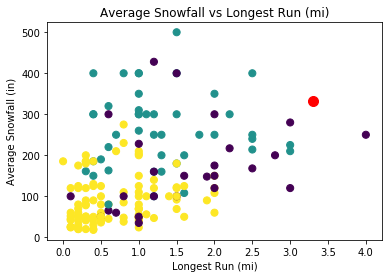

In [103]:
# let's take a look at average snowfall and longest run
plt.scatter(df['LongestRun_mi'], df['averageSnowfall'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['LongestRun_mi'], ac['averageSnowfall'], c='red', s=100)
plt.xlabel('Longest Run (mi)')
plt.ylabel('Average Snowfall (in)')
plt.title('Average Snowfall vs Longest Run (mi)')
plt.savefig('figures/fig1.png',bbox_inches='tight')

This is a great representation of how much the resorts vary in longest run compared with the average snowfall. In the next plot, I will show a factor that is very closely correlated (Adult Weekday); since we are in control of this variable, we probably should not have included it in this model to determine the appropriate Adult Weekend price, but let's take a look at it.

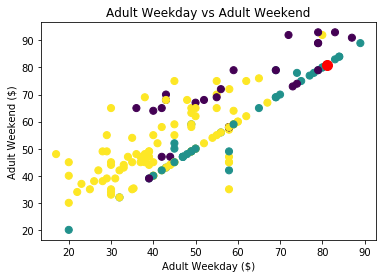

In [104]:
# let's take a look at Adult Weekend Price vs. Adult Weekday Price
plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['AdultWeekday'], ac['AdultWeekend'], c='red', s=100)
plt.xlabel('Adult Weekday ($)')
plt.ylabel('Adult Weekend ($)')
plt.title('Adult Weekday vs Adult Weekend')
plt.savefig('figures/fig1.png',bbox_inches='tight')

We can see the strong correlation between the two prices of lift tickets. We can also see where we assumed the average to fill in missing data. Now, let's take a look at skiable acres for Adult Weekend Price.

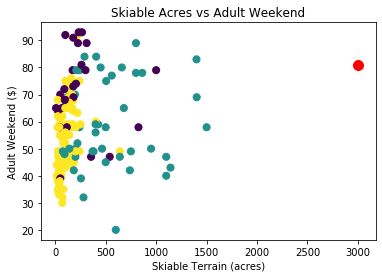

In [105]:
# let's take a look at skiable acres vs. Adult Weekend Price
plt.scatter(df['SkiableTerrain_ac'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['SkiableTerrain_ac'], ac['AdultWeekend'], c='red', s=100)
plt.xlabel('Skiable Terrain (acres)')
plt.ylabel('Adult Weekend ($)')
plt.title('Skiable Acres vs Adult Weekend')
plt.savefig('figures/fig1.png',bbox_inches='tight')

This graph shows how Big Mountain is an outlier compared to the data set we were using to create the model. It's also surprising how little the skiable terrain is looks correlated to the price of the Adult Weekend Lift Ticket (at least for this data set).

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [106]:
s = pickle.dumps(model1)
from joblib import dump, load
dump(model1, 'models/regression_model_adultweekend.joblib')

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

Random forest model does not have coefficients, so we will just have to reference the pickled version if you want the details of the mmodel. Let's include the performance metrics and the features.


In [107]:
model1.feature_importances_

array([0.02914859, 0.        , 0.        , 0.        , 0.00069724,
       0.00595445, 0.01025652, 0.00649399, 0.00521819, 0.01804918,
       0.0220665 , 0.0070074 , 0.02365032, 0.02362348, 0.07283234,
       0.00980366, 0.02210775, 0.02828179, 0.66619255, 0.01350819,
       0.01823676, 0.0168711 ])

In [108]:
# this seems like it's better stored in a dictionary, but I can convert to DF
data = {'features':X.columns, 'importance':model1.feature_importances_} # 'performance':[m1_evs,m1_mae]}
dfm = pd.DataFrame(data)
perf = {'features':['Explained Model Variance', 'Mean Absolute Error'], 'importance':[m1_evs,m1_mae]}
dfp = pd.DataFrame(perf)
dfm.append(dfp)

,features,importance
0,vertical_drop,0.029149
1,trams,0.000000
2,fastEight,0.000000
3,fastSixes,0.000000
4,fastQuads,0.000697
5,quad,0.005954
6,triple,0.010257
7,double,0.006494
8,surface,0.005218
9,total_chairs,0.018049


In [109]:
# Write your dataframe to csv 
dfm.to_csv("step6_output.csv")

This was an interesting problem to work on. 